Name:Rutik

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
data=pd.read_csv('/content/car data.csv')

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
data.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
data = data.drop_duplicates(subset=['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'])

In [10]:

data.duplicated().sum()

0

In [11]:
print(data['Fuel_Type'].value_counts())
print(data['Selling_type'].value_counts())
print(data['Transmission'].value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Selling_type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


Text(0.5, 1.0, 'Selling Price VS Driven in Kilometers')

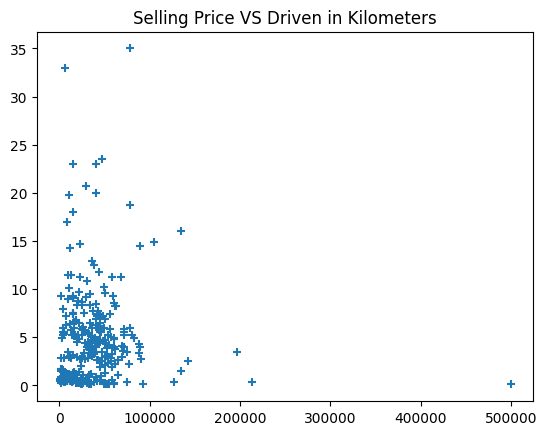

In [12]:
plt.scatter(data.Driven_kms,data.Selling_Price,marker='+')
plt.title('Selling Price VS Driven in Kilometers')

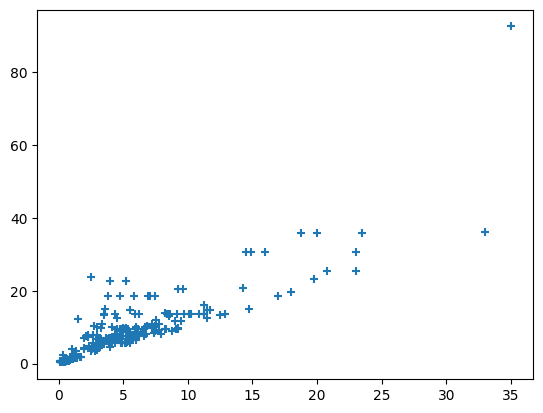

In [13]:
plt.scatter(data.Selling_Price,data.Present_Price,marker='+')

In [14]:

data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [15]:
X=data.drop(['Car_Name','Selling_Price'],axis=1)
Y=data['Selling_Price']

In [16]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

model=LinearRegression()

In [19]:
model.fit(X_train,Y_train)

LinearRegression()

In [20]:
Y_test=Y_test.to_numpy()
Y_test=Y_test.reshape(-1,1)

In [21]:
model.predict(X_test)

array([  2.00286818,   8.19762433,   1.95867185,   2.12780689,
         4.50941331,   5.17497621,   5.69676373,   2.14475544,
         1.86135549,   1.61089782,   5.96352652, -10.48445983,
        10.19969223,   1.98625368,   9.02932213,   1.89120811,
         9.15174884,   0.8186719 ,  17.81018334,   0.37884704,
         4.25161729,   1.02222909,   1.84901127,   7.05250306,
         2.20100795,   4.35013292,   1.07229226,   6.06275163,
         5.32396887,  -0.35505593,   1.84366545,  -0.61406923,
        52.70195331,   4.43155263,   4.4429903 ,  10.32787632,
         1.91207743,   0.53492702,   4.04305072,   1.26247326,
         9.02939524,   9.5555468 ,  17.02448108,  11.40395787,
         3.06920274,   7.62062873,   2.18094333,  14.67786305,
         7.06656317,   2.2801776 ,   5.9480726 ,  10.41995198,
         3.93900212,  -0.20198774,   8.58847772,   3.79664233,
         9.54303882,   3.54397291,   8.43129939,   3.89494369])

In [22]:
model.accuracy_score(X_test,y_pred)

AttributeError: ignored